In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("fivethirtyeight")

In [2]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-11-19,92343.789062,92343.789062,94002.867188,90426.984375,90536.812500,74521048295
2024-11-20,94339.492188,94339.492188,94902.023438,91619.500000,92341.890625,71730956426
2024-11-21,98504.726562,98504.726562,99014.218750,94132.601562,94334.640625,106024505582
2024-11-22,98997.664062,98997.664062,99655.500000,97222.664062,98496.429688,78473580551
2024-11-23,98637.000000,98637.000000,99005.304688,98360.640625,99005.304688,66666049536


In [5]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Adj Close,BTC-USD,3721.0,1.878803e+04,2.077221e+04,1.781030e+02,1.193910e+03,9.278808e+03,3.013905e+04,9.899766e+04
Close,BTC-USD,3721.0,1.878803e+04,2.077221e+04,1.781030e+02,1.193910e+03,9.278808e+03,3.013905e+04,9.899766e+04
High,BTC-USD,3721.0,1.918881e+04,2.120202e+04,2.117310e+02,1.215510e+03,9.439323e+03,3.059059e+04,9.965550e+04
Low,BTC-USD,3721.0,1.832152e+04,2.026388e+04,1.715100e+02,1.175360e+03,9.127770e+03,2.955643e+04,9.836064e+04
Open,BTC-USD,3721.0,1.876283e+04,2.073489e+04,1.768970e+02,1.189360e+03,9.277205e+03,3.011033e+04,9.900530e+04
Volume,BTC-USD,3721.0,1.810912e+10,1.970655e+10,5.914570e+06,3.518760e+08,1.441323e+10,2.912400e+10,3.509679e+11


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3721 entries, 2014-09-17 to 2024-11-23
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  3721 non-null   float64
 1   (Close, BTC-USD)      3721 non-null   float64
 2   (High, BTC-USD)       3721 non-null   float64
 3   (Low, BTC-USD)        3721 non-null   float64
 4   (Open, BTC-USD)       3721 non-null   float64
 5   (Volume, BTC-USD)     3721 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 203.5 KB


In [7]:
stock_data.columns

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
#Close price data
closing_price = stock_data[['Close']]

In [9]:
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-11-19,92343.789062
2024-11-20,94339.492188


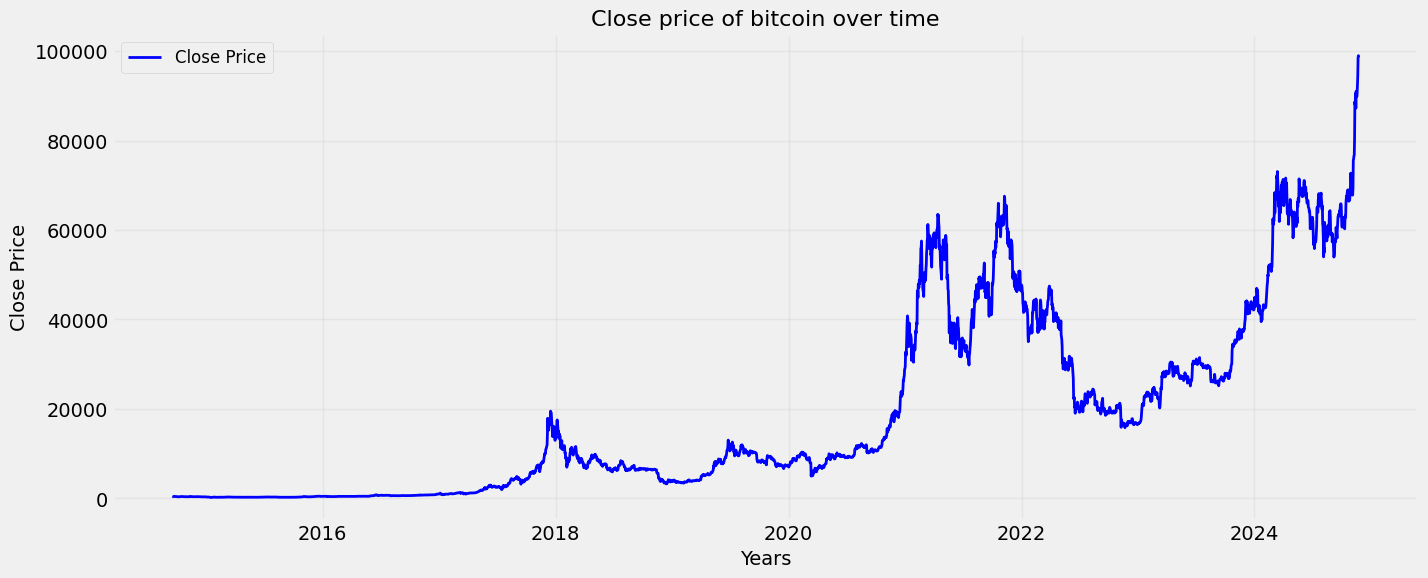

In [10]:
# Float closing price with enhancement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth=2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [11]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[0:5])/5)

30.0


In [12]:
df1 = pd.DataFrame(temp_data)

In [13]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [15]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 356).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_8104\1009629101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 356).mean()
C:\Users\KIIT01\AppData\Local\Temp\ipykernel_8104\1009629101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


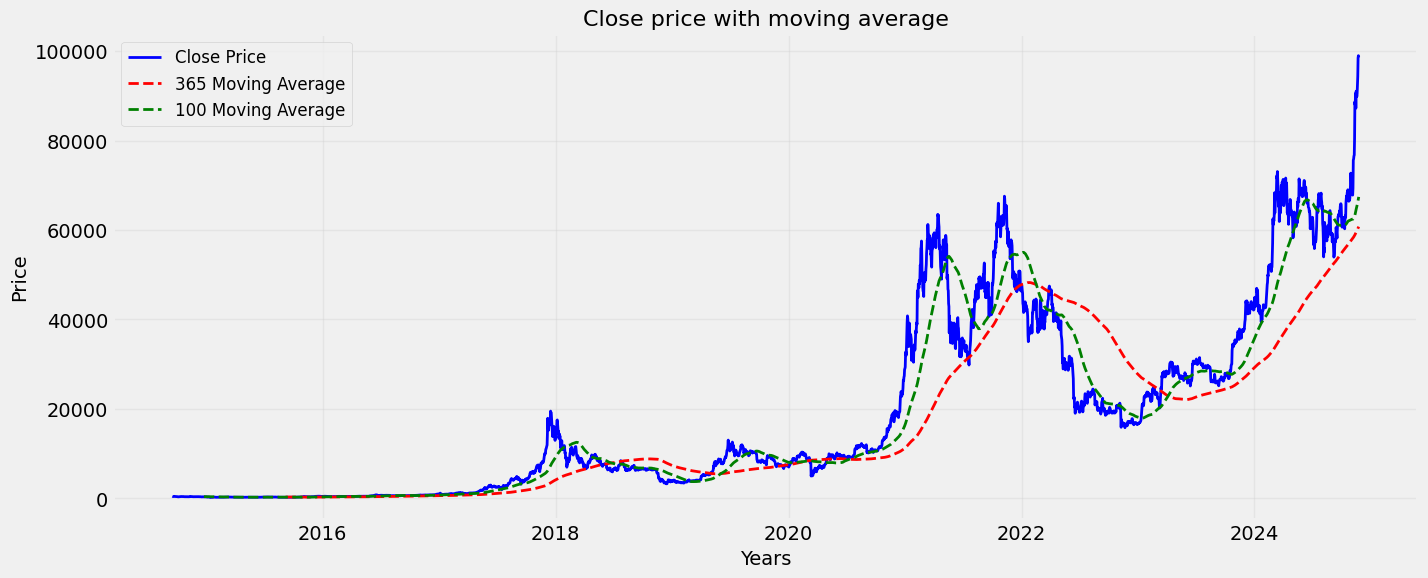

In [16]:
# Float closing price with enhancement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth=2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Moving Average', color = 'red', linestyle="--", linewidth=2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Moving Average', color = 'green', linestyle="--", linewidth=2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [17]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [18]:
scaled_data

array([[0.00282567],
       [0.0024928 ],
       [0.00219281],
       ...,
       [0.99501174],
       [1.        ],
       [0.99635028]])

In [19]:
len(scaled_data)

3721

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
# Prepare data for LSTM
x_data = []
y_data = []
base_days = 100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i - base_days: i])
    y_data.append(scaled_data[i])

x_data = np.array(x_data)
y_data = np.array(y_data)

In [22]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [23]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train, y_train, batch_size = 32, epochs = 40)

Epoch 1/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 178ms/step - loss: 0.0066
Epoch 2/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - loss: 2.9545e-04
Epoch 3/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - loss: 2.7016e-04
Epoch 4/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - loss: 2.6162e-04
Epoch 5/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - loss: 2.3068e-04
Epoch 6/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - loss: 1.7155e-04
Epoch 7/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - loss: 2.1199e-04
Epoch 8/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - loss: 1.6270e-04
Epoch 9/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - loss: 1.4243e-04
Epoch 10/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - loss: 1.5297e-04
Epoch 11/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - loss: 1.8474e-04
Epoch 12/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - loss: 1.4362e-04
Epoch 13/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - loss: 1.3083e-04
Epoch 14/40
102/102 ━━━━━━━━━━━━━━━━━━

In [25]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step


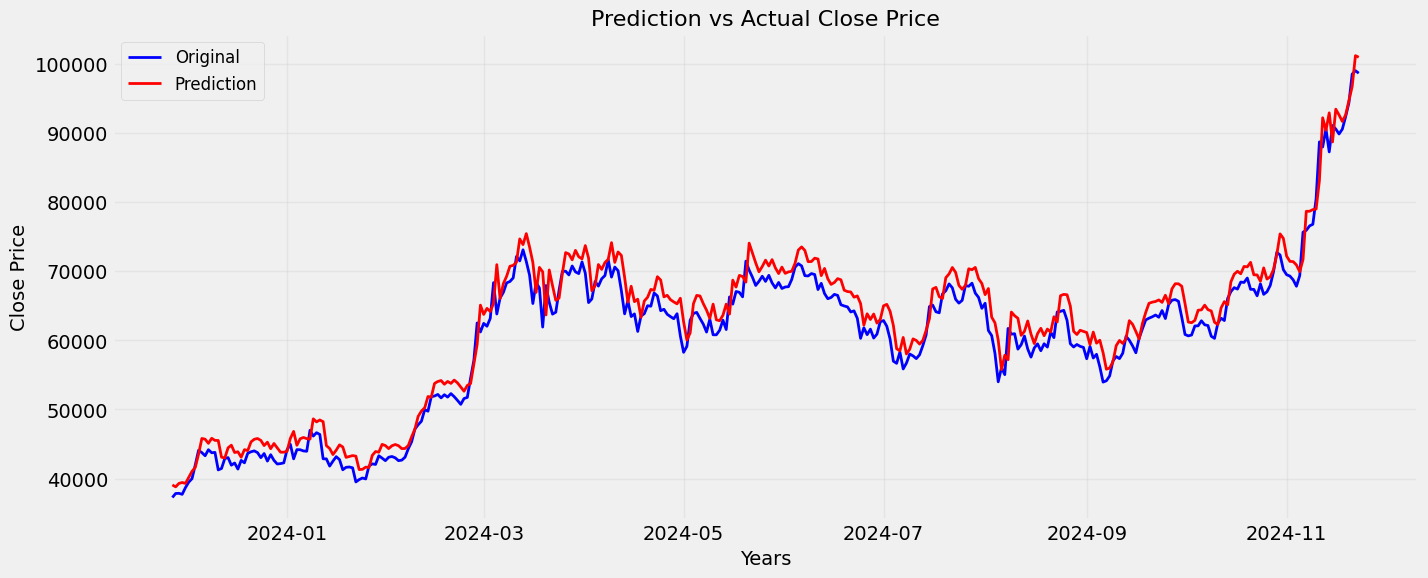

In [26]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten()
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth=2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red', linewidth=2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [27]:
# Predict future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_predictions = []
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [28]:
future_predictions

[array([[100177.9]], dtype=float32),
 array([[102037.7]], dtype=float32),
 array([[104022.93]], dtype=float32),
 array([[105986.6]], dtype=float32),
 array([[107853.25]], dtype=float32),
 array([[109589.266]], dtype=float32),
 array([[111187.836]], dtype=float32),
 array([[112656.13]], dtype=float32),
 array([[114006.24]], dtype=float32),
 array([[115250.]], dtype=float32)]

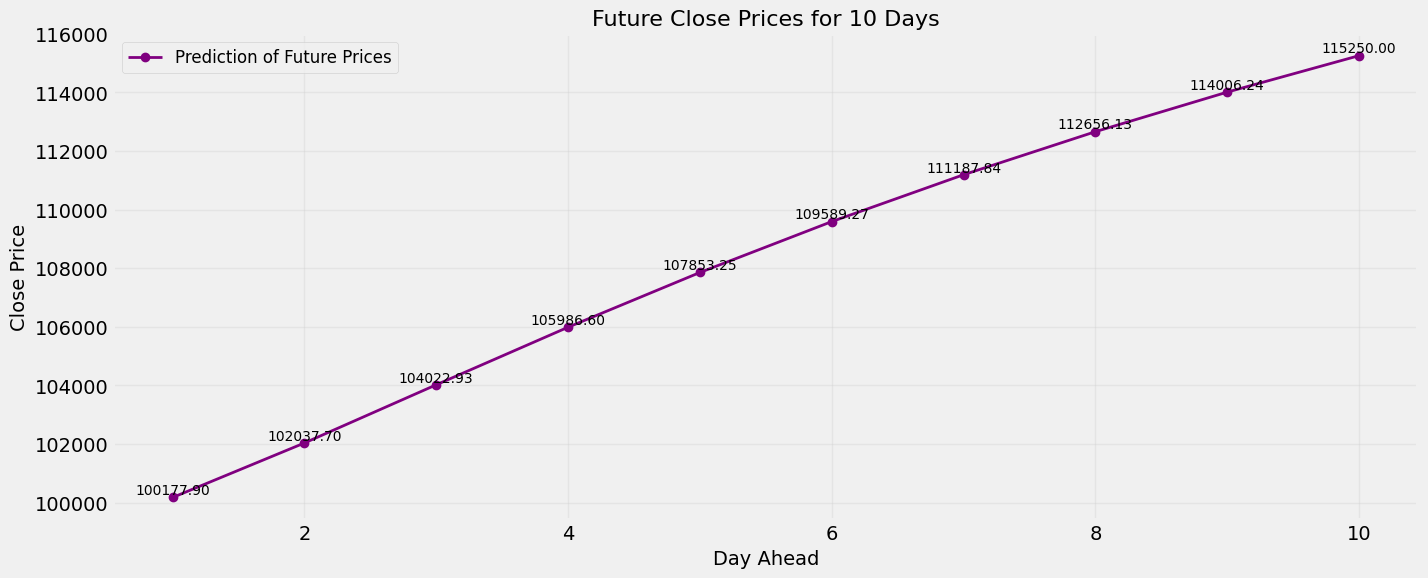

In [29]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker = "o", label = 'Prediction of Future Prices', color = 'purple', linewidth=2)

for i, val in enumerate(future_predictions):
    plt.text(i+1, val, f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color = 'black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [30]:
model.save("model.keras")